# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
total_rides_by_city_type = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_rides_by_city_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [73]:
# 2. Get the total drivers for each city type
#pyber_data_df.head(5)

total_drivers_by_city_type = city_data_df.groupby(["type"]).sum()["driver_count"]
total_drivers_by_city_type


type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [74]:
#  3. Get the total amount of fares for each city type
total_fares_by_city_type = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fares_by_city_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [75]:
#  4. Get the average fare per ride for each city type. 
avg_fare_by_city_type = pyber_data_df.groupby(["type"]).mean()["fare"]
avg_fare_by_city_type

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [76]:
# 5. Get the average fare per driver for each city type. 
avg_drivers_by_city_type = pyber_data_df.groupby(["type"]).mean()["driver_count"]
avg_drivers_by_city_type

type
Rural        4.296000
Suburban    13.712000
Urban       36.678154
Name: driver_count, dtype: float64

In [77]:
#  6. Create a PyBer summary DataFrame. 
pyber_data_df.describe()
total_rides_by_city_type.name   = "Total Rides"
total_drivers_by_city_type.name = "Total Drivers"
total_fares_by_city_type.name   = "Total Fares"
avg_fare_by_city_type.name      = "Average Fare Per Ride"
avg_drivers_by_city_type.name   = "Average Fare Per Driver"

pyber_summary_df = pd.concat([total_rides_by_city_type, 
                              total_drivers_by_city_type,
                              total_fares_by_city_type,
                              avg_fare_by_city_type, 
                              avg_drivers_by_city_type], axis=1)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare Per Ride,Average Fare Per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,4.296000
Suburban,625,490,19356.33,30.970128,13.712000
Urban,1625,2405,39854.38,24.525772,36.678154


In [78]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.Name = None

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare Per Ride,Average Fare Per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,4.296000
Suburban,625,490,19356.33,30.970128,13.712000
Urban,1625,2405,39854.38,24.525772,36.678154


In [79]:
#  8. Format the columns.

#pyber_summary_df['Total Fares'] = pyber_summary_df['Total Fares'].format('${0:,.2f}')
format_dict = {'Total Rides' : '{:,}',
               'Total Drivers' : '{:,}',
               'Total Fares' : '${0:,.2f}', 
               'Average Fare Per Ride':'${0:,.2f}', 
               "Average Fare Per Driver": '${0:,.2f}' }
pyber_summary_df.style.format(format_dict).hide_index()


/var/folders/79/qwd7z0dn71ncnmdc1lbd61qw0000gn/T/ipykernel_95249/821612968.py:9: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  pyber_summary_df.style.format(format_dict).hide_index()


Total Rides,Total Drivers,Total Fares,Average Fare Per Ride,Average Fare Per Driver
125,78,"$4,327.93",$34.62,$4.30
625,490,"$19,356.33",$30.97,$13.71
"1,625","2,405","$39,854.38",$24.53,$36.68


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [11]:
# 1. Read the merged DataFrame
# In Step 1, create a new DataFrame with multiple indices 
# using the groupby() function on the "type" and "date" columns 
# of the pyber_data_df DataFrame, then apply the sum() method on the
#"fare" column to show the total fare amount for each date.

pyber_fareby_type_date_df = pyber_data_df.groupby(["type", "date"]).sum()["fare"]
pyber_fareby_type_date_df

type   date               
Rural  2019-01-01 09:45:36    43.69
       2019-01-02 11:18:32    52.12
       2019-01-03 19:51:01    19.90
       2019-01-04 03:31:26    24.88
       2019-01-06 07:38:40    47.33
                              ...  
Urban  2019-05-08 04:20:00    21.99
       2019-05-08 04:39:49    18.45
       2019-05-08 07:29:01    18.55
       2019-05-08 11:38:35    19.77
       2019-05-08 13:10:18    18.04
Name: fare, Length: 2375, dtype: float64

In [12]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
pyber_sumoffares_type_date_df = pyber_data_df.groupby(["city", "type", "date"]).sum()["fare"]
pyber_sumoffares_type_date_df.head(10)

city         type   date               
Amandaburgh  Urban  2019-01-02 09:57:04    33.06
                    2019-01-11 02:22:07    29.24
                    2019-01-13 16:04:10    23.35
                    2019-01-21 04:12:54     9.26
                    2019-01-29 23:28:12    41.06
                    2019-02-06 10:02:30    11.93
                    2019-02-10 20:42:46    36.17
                    2019-02-24 23:10:49    43.66
                    2019-03-05 02:15:38    26.28
                    2019-03-07 02:26:33    18.76
Name: fare, dtype: float64

In [13]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
pyber_fareby_type_date_df = pyber_fareby_type_date_df.reset_index()
pyber_fareby_type_date_df

,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33
...,...,...,...
2370,Urban,2019-05-08 04:20:00,21.99
2371,Urban,2019-05-08 04:39:49,18.45
2372,Urban,2019-05-08 07:29:01,18.55
2373,Urban,2019-05-08 11:38:35,19.77


In [14]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 

table = pd.pivot_table(pyber_fareby_type_date_df, values=['fare'], index=['date'], columns = ['type']
                    )
table

fare                
type                Rural Suburban  Urban
date                                     
2019-01-01 00:08:16   NaN      NaN  37.91
2019-01-01 00:46:46   NaN    47.74    NaN
2019-01-01 02:07:24   NaN    24.07    NaN
2019-01-01 03:46:50   NaN      NaN   7.57
2019-01-01 05:23:21   NaN      NaN  10.75
...                   ...      ...    ...
2019-05-08 04:20:00   NaN      NaN  21.99
2019-05-08 04:39:49   NaN      NaN  18.45
2019-05-08 07:29:01   NaN      NaN  18.55
2019-05-08 11:38:35   NaN      NaN  19.77
2019-05-08 13:10:18   NaN      NaN  18.04

[2375 rows x 3 columns]

In [15]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

fares_Jan_April = table.loc['2019-01-01':'2019-04-28']
fares_Jan_April.head(20)


fare                
type                 Rural Suburban  Urban
date                                      
2019-01-01 00:08:16    NaN      NaN  37.91
2019-01-01 00:46:46    NaN    47.74    NaN
2019-01-01 02:07:24    NaN    24.07    NaN
2019-01-01 03:46:50    NaN      NaN   7.57
2019-01-01 05:23:21    NaN      NaN  10.75
2019-01-01 09:45:36  43.69      NaN    NaN
2019-01-01 12:32:48    NaN    25.56    NaN
2019-01-01 14:40:14    NaN      NaN   5.42
2019-01-01 14:42:25    NaN      NaN  12.31
2019-01-01 14:52:06    NaN    31.15    NaN
2019-01-01 17:22:58    NaN      NaN  42.11
2019-01-01 21:04:01    NaN      NaN  11.71
2019-01-02 00:13:08    NaN    44.71    NaN
2019-01-02 00:44:03    NaN      NaN  43.72
2019-01-02 00:56:53    NaN      NaN  37.34
2019-01-02 01:41:26    NaN    49.95    NaN
2019-01-02 01:46:40    NaN      NaN  34.79
2019-01-02 06:55:36    NaN      NaN  16.96
2019-01-02 07:26:53    NaN    33.57    NaN
2019-01-02 09:28:27    NaN      NaN  19.81

In [16]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)

fares_Jan_April.index = pd.to_datetime(fares_Jan_April.index)
fares_Jan_April

fare                
type                 Rural Suburban  Urban
date                                      
2019-01-01 00:08:16    NaN      NaN  37.91
2019-01-01 00:46:46    NaN    47.74    NaN
2019-01-01 02:07:24    NaN    24.07    NaN
2019-01-01 03:46:50    NaN      NaN   7.57
2019-01-01 05:23:21    NaN      NaN  10.75
...                    ...      ...    ...
2019-04-27 17:58:27  14.01      NaN    NaN
2019-04-27 19:45:48    NaN    28.84    NaN
2019-04-27 20:41:36    NaN      NaN   8.28
2019-04-27 23:26:03    NaN      NaN  19.06
2019-04-27 23:52:44    NaN    45.98    NaN

[2177 rows x 3 columns]

In [40]:
# 7. Check that the datatype for the index is datetime using df.info()
#fares_Jan_April.info()
fares_Jan_April.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2177 entries, 2019-01-01 00:08:16 to 2019-04-27 23:52:44
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (fare, Rural)     114 non-null    float64
 1   (fare, Suburban)  567 non-null    float64
 2   (fare, Urban)     1496 non-null   float64
dtypes: float64(3)
memory usage: 68.0 KB


In [51]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.

fares_by_week = fares_Jan_April.resample('W').sum()
fares_by_week = fares_by_week.xs('fare', axis=1, drop_level=True)

fares_by_week



type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


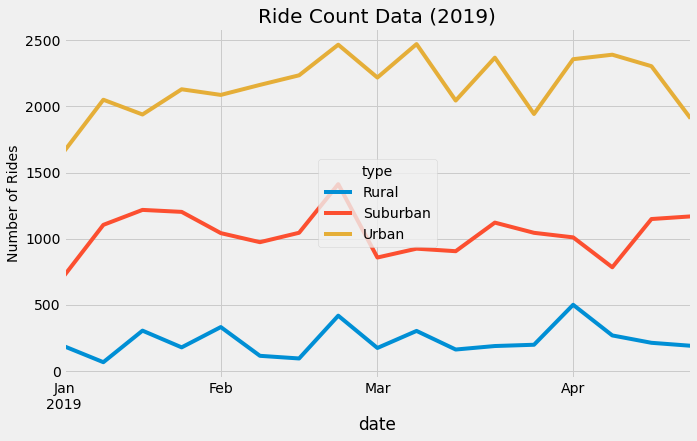

In [83]:
# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

ax = fares_by_week.plot(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
#ax.set_xlabel("City Types",fontsize=14)

plt.savefig("analysis/faresbycitytype.png")
plt.show()